# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [49]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
import os
import numpy as np

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

## 1. Visualize some sample images from different classes

In [50]:
import matplotlib.pyplot as plt

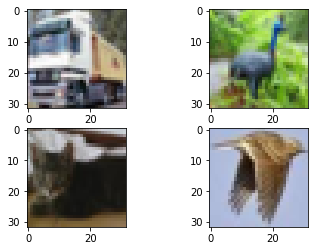

In [51]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(x_train[1])
axs[0, 1].imshow(x_train[6])
axs[1, 0].imshow(x_train[9])
axs[1, 1].imshow(x_train[123])

## 2. AlexNet model construction

In [52]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [53]:
#We define the AlexNet Model

def AlexNet(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(96,(11,11),strides = 4,padding = 'same', name="conv0")(X_input)
  X = BatchNormalization(name = "bn0")(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max0')(X)

  X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
  X = BatchNormalization(name='bn1')(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max1')(X)

  #X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
 # X = BatchNormalization(axis = 3, name = 'bn2')(X)
  #X = Activation('relu')(X)

 # X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
  #X = BatchNormalization(axis = 3, name = 'bn3')(X)
  #X = Activation('relu')(X)

  X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
  X = BatchNormalization(name = 'bn4')(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max2')(X)

  X = Flatten()(X)

  X = Dense(4096, activation = 'relu', name = "fc0")(X)
  X = Dropout(0.5)(X)

  X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
  X = Dropout(0.5)(X)

  X = Dense(10,activation='softmax',name = 'fc2')(X)

  model = Model(inputs = X_input, outputs = X, name='AlexNet')

  return model

In [54]:
alex = AlexNet(x_train.shape[1:])

In [55]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 8, 8, 96)          34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 4, 4, 96)          0         
_________________________________________________________________
conv1 (Conv2D)               (None, 4, 4, 256)         614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 4, 4, 256)         1024

In [56]:
# Compilation of the model
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [57]:
print("Fit train")
history = alex.fit(x_train, y_train, batch_size=batch_size,validation_data=(x_test, y_test), epochs=epochs)

Fit train
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9892 - accuracy: 0.2714 - val_loss: 1.8317 - val_accuracy: 0.3077
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4825 - accuracy: 0.4564 - val_loss: 1.7927 - val_accuracy: 0.3909
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3096 - accuracy: 0.5357 - val_loss: 1.2555 - val_accuracy: 0.5545
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1815 - accuracy: 0.5854 - val_loss: 1.2623 - val_accuracy: 0.5569
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0647 - accuracy: 0.6296 - val_loss: 1.2527 - val_accuracy: 0.5672
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9642 - accuracy: 0.6639 - val_loss: 1.1644 - val_accuracy: 0.5855
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8820 - accuracy: 0.6947 - val_loss

In [58]:
preds = alex.evaluate(x_test,y_test,batch_size=batch_size)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 2s 6ms/step - loss: 1.1102 - accuracy: 0.6359
Loss = 1.1102303266525269
Test Accuracy = 0.6359000205993652


## Optimization of the model

In [59]:
!pip install keras-tuner

from kerastuner import HyperModel

In [72]:
def build_model(hp):

  X_input = Input(shape=(32,32,3))

  X = Conv2D(96,(11,11),strides = 4,padding = 'same', input_shape=(32,32,3,),name="conv0")(X_input)

  X = BatchNormalization(name = "bn0")(X)

  X = Activation(
      activation=hp.Choice(
        'Activation_activation',
        values=['relu', 'tanh', 'sigmoid','softmax','softplus','elu','selu','softsign'],
        default='relu'))(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max0')(X)

  X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)

  X = BatchNormalization(name='bn1')(X)

  X = Activation(activation=hp.Choice(
        'Activation_activation',
        values=['relu', 'tanh', 'sigmoid','softmax','softplus','elu','selu','softsign'],
        default='relu'))(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max1')(X)

  #X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
 # X = BatchNormalization(axis = 3, name = 'bn2')(X)
  #X = Activation('relu')(X)

 # X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
  #X = BatchNormalization(axis = 3, name = 'bn3')(X)
  #X = Activation('relu')(X)

  X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)

  X = BatchNormalization(name = 'bn4')(X)

  X = Activation(activation=hp.Choice(
        'Activation_activation',
        values=['relu', 'tanh', 'sigmoid','softmax','softplus','elu','selu','softsign'],
        default='relu'))(X)

  X = MaxPooling2D((3,3),strides = 2,padding = 'same',name = 'max2')(X)

  X = Flatten()(X)

  X = Dense(units=hp.Int(
        'units',
        min_value=1000,
        max_value=5000,
        step=500,
        default=4096
    ),
    activation=hp.Choice(
        'dense_activation',
        values=['relu', 'tanh', 'sigmoid'],
        default='relu'
    ), name = "fc0")(X)
  X = Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=1,
                default=0.5,
                step=0.05,
            ))(X)

  X = Dense(units=hp.Int(
        'units',
        min_value=1000,
        max_value=5000,
        step=500,
        default=4096
    ),
    activation=hp.Choice(
        'dense_activation',
        values=['relu', 'tanh', 'sigmoid'],
        default='relu'
    ), name = 'fc1')(X) 
  X = Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=1,
                default=0.5,
                step=0.05,
            ))(X)

  X = Dense(10,
            activation=hp.Choice(
        'dense_activation',
        values=['relu', 'tanh', 'sigmoid'],
        default='relu'
    ),name = 'fc2')(X)


  model = Model(inputs = X_input, outputs = X, name='AlexNet')

  model.compile(optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ), loss = 'categorical_crossentropy' , metrics=['accuracy'])

  return model

In [73]:
import kerastuner
 
tuner = kerastuner.tuners.Hyperband(
  build_model,
  objective='val_accuracy',
  max_epochs=10,
  executions_per_trial=2,
  directory='my_dir')